# Домашнее задание 5. Градиентный спуск. (10 баллов + 2 балла бонус)

В этом домашнем задании вы реализуете градиентный спуск для линейной регрессии, а также изучите, как он ведёт себя при разных параметрах и с разными функциями потерь.

Правила:

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания всем участникам нарушения будет выставлено 0 баллов, независимо от того, кто у кого списывал.

* Старайтесь сделать код максимально оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, рассмотренных в курсе.  

In [1]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — **Mean Squared Error (MSE)**:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов.

Чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его **не нужно**. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса.
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять градиент функции потерь по параметрам модели.

In [2]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число - значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`.

Он должен вычислять лосс и градиент по формулам наверху.

In [3]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        return np.linalg.norm(X @ w - y) ** 2 / X.shape[0]

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        return (X.T @ (X @ w - y)) * 2 / X.shape[0]

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [4]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^{t+1} = w^{t} - \eta \nabla_{w} Q(w^{t}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`.

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`,
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше, и возвращать
траекторию спуска (список из новых значений весов на каждом шаге).

In [5]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) - начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) - матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) - вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int --сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) - история весов на каждом шаге
    """
    trace = np.zeros((n_iterations + 1, w_init.shape[0]))
    trace[0] = w_init
    for i in range(n_iterations):
        grad = loss.calc_grad(X, y, trace[i])
        w = w_init - lr * grad
        trace[i + 1] = w
        w_init = w
    return trace

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории.

In [6]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :] # разные масштабы признаков
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [7]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.5891768045025
0.8670644395649494


In [8]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # Отображение уровня функции потерь
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # Отображение траектории спуска
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте четыре и более различных значений для `lr`.

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска.

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`.
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1.

In [9]:
lrs = [1e-4, 1e-3, 1e-2, 1.15e-2]

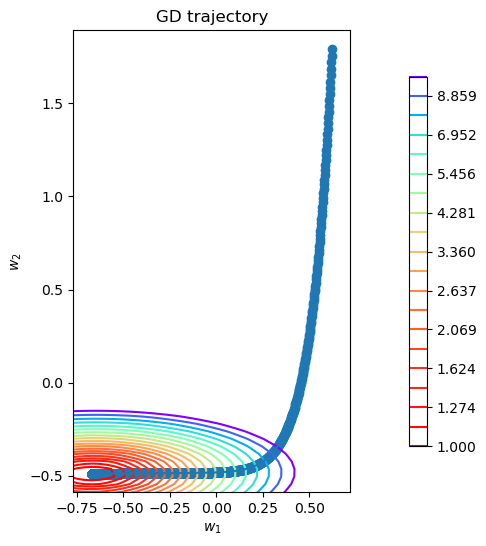

lr = 0.0001, loss = 0.8670644395649092


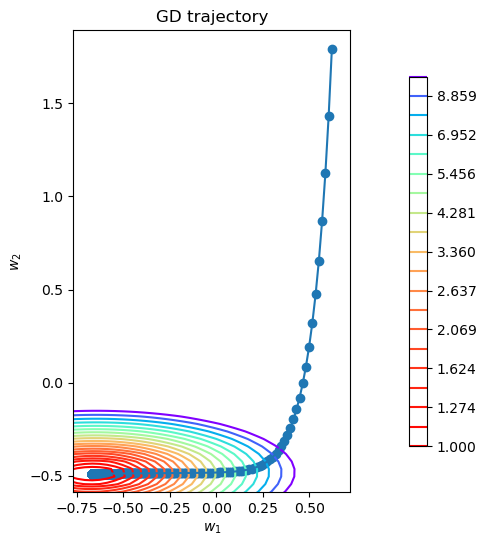

lr = 0.001, loss = 0.8670644395649089


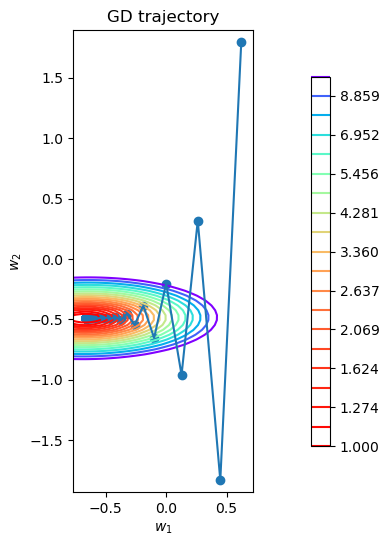

lr = 0.01, loss = 0.8670644395649092


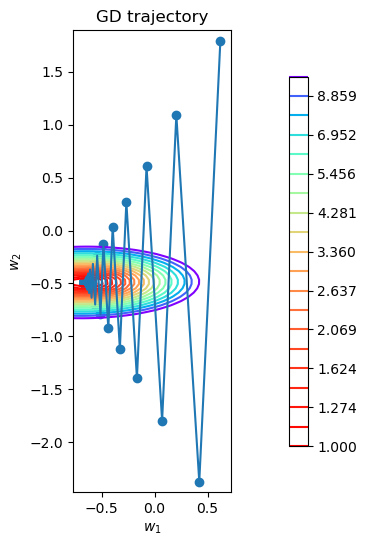

lr = 0.0115, loss = 0.8670644395649092


In [10]:
# Проверим 4 разных значения длины шага

for lr in lrs:
    # используем n_iterations = 100000 по умолчанию
    w_list = gradient_descent(w_init, X, y, loss, lr)
    plot_gd(w_list, X, y, loss)
    print(f"lr = {lr}, loss = {loss.calc_loss(X, y, w_list[-1])}")

Заметим, что длина шага напрямую влияет на поведение промежуточных векторов весов. Чем меньше шаг, тем более плавно будет двигаться градиентный спуск. Если явно сравнивать траекторию для длины шага $0.0001$ и $0.015$, то можно заметить нестабильное поведение градиентного спуска при большом шаге, траектория — зигзаг.

Более того, при подборе значений длины шага было замечено, что, например при $lr = 0.1$ градиентный спуск не сходится, возникают значения NaN. Это может свидетельствовать о том, что градиентный спуск превращается в "градиентный подъем".

Казалось бы, что вывод — всегда брать маленькую длину шага. Однако существует ненулевая вероятность того, что при слишком маленьком шаге градиентный спуск не дойдет до локального минимума за фиксированное количество шагов. Проверим это:

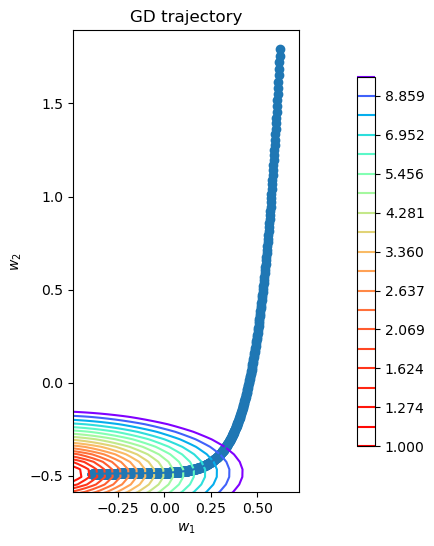

lr = 0.0001, loss = 1.4703488414555739


lr = 0.001, loss = 0.867064439565354


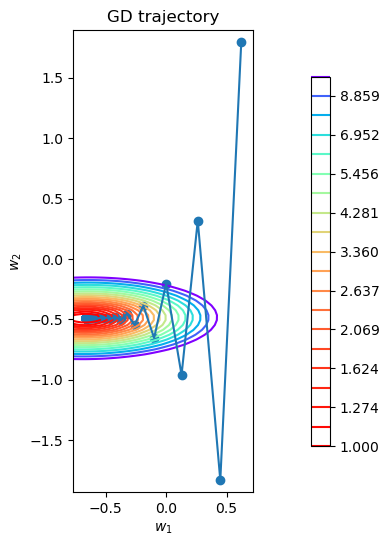

lr = 0.01, loss = 0.8670644395649092


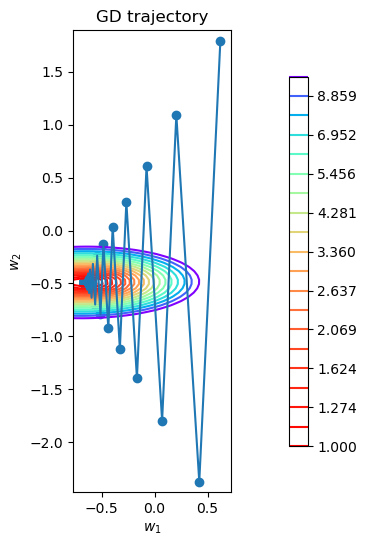

lr = 0.0115, loss = 0.8670644395649092


In [11]:
for lr in lrs:
    w_list = gradient_descent(w_init, X, y, loss, lr, 1000)
    plot_gd(w_list, X, y, loss)
    print(f"lr = {lr}, loss = {loss.calc_loss(X, y, w_list[-1])}")

Можно заметить, что при `n_iterations = 1000` и `lr = 0.0001` градиентный спуск не успевает дойти до минимума.

Теперь реализуем стохастический градиентный спуск.

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`.

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча.

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [12]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    trace = np.zeros((n_iterations + 1, w_init.shape[0]))
    trace[0] = w_init
    for i in range(n_iterations):
        idx = np.random.choice(X.shape[0], batch_size, replace=False)
        X_batch = X[idx]
        y_batch = y[idx]
        grad = loss.calc_grad(X_batch, y_batch, trace[i])
        w = trace[i] - lr * grad
        trace[i + 1] = w
    return trace

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`.

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного? Что происходит при малых и больших `batch_size`?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

In [13]:
batch_sizes = [1, 10, 50, 100]

================lr = 0.0001================


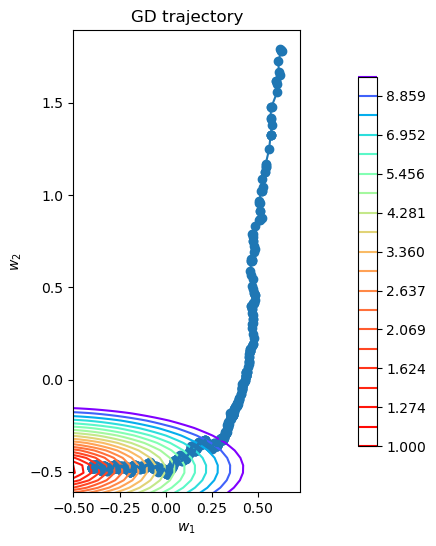

lr = 0.0001, batch_size = 1, loss = 1.4328504129619832


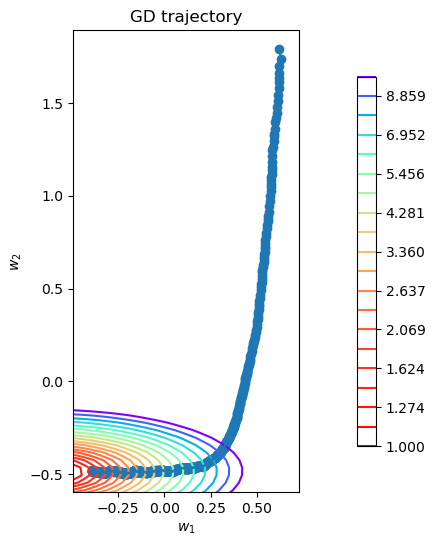

lr = 0.0001, batch_size = 10, loss = 1.4671656738487315


lr = 0.0001, batch_size = 50, loss = 1.4801310451850092


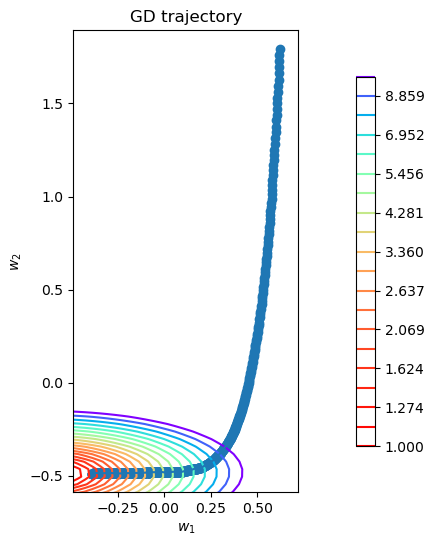

lr = 0.0001, batch_size = 100, loss = 1.4743686973278052
================lr = 0.001================


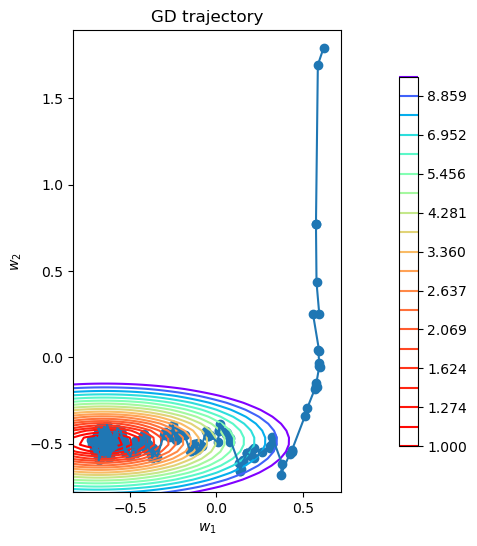

lr = 0.001, batch_size = 1, loss = 0.9030844372263592


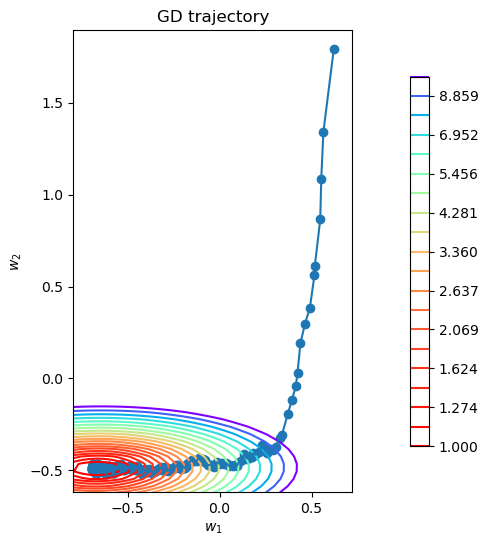

lr = 0.001, batch_size = 10, loss = 0.869432784723286


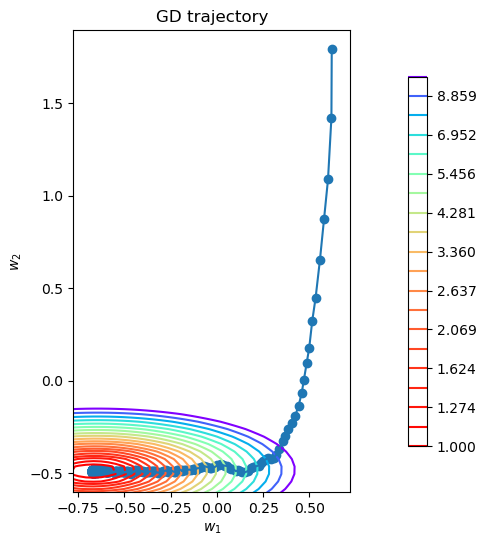

lr = 0.001, batch_size = 50, loss = 0.8713520192997399


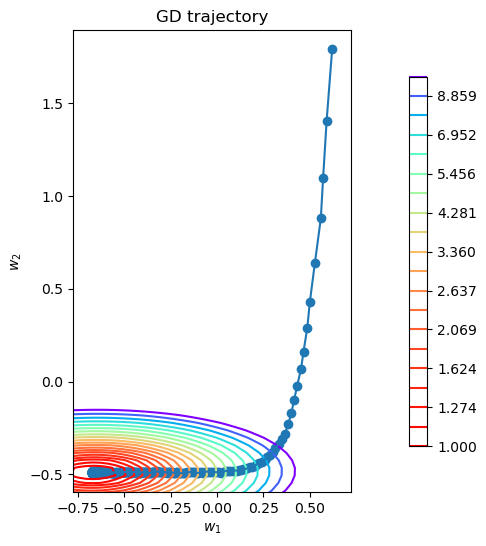

lr = 0.001, batch_size = 100, loss = 0.8672156201362908
================lr = 0.01================


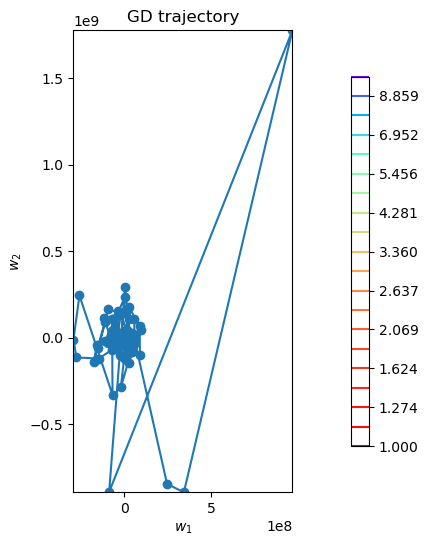

lr = 0.01, batch_size = 1, loss = 6972057330246.714


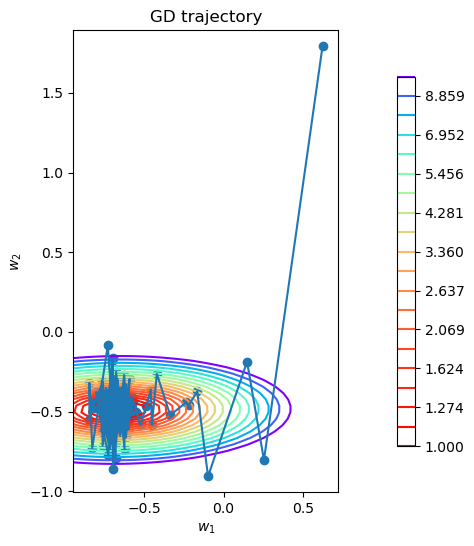

lr = 0.01, batch_size = 10, loss = 1.0863892529392414


lr = 0.01, batch_size = 50, loss = 0.8700161202150036


lr = 0.01, batch_size = 100, loss = 0.8718344691435914
================lr = 0.0115================


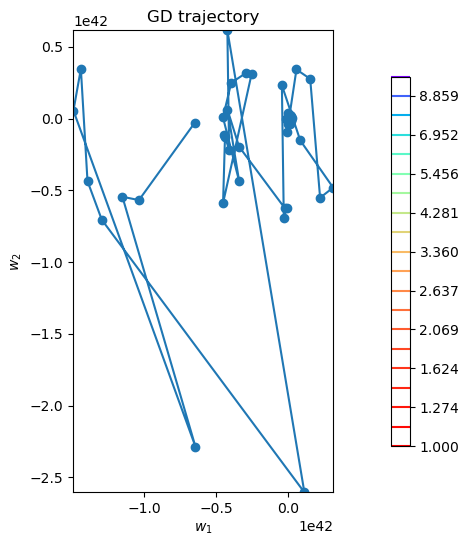

lr = 0.0115, batch_size = 1, loss = 3.2919982581789347e+84


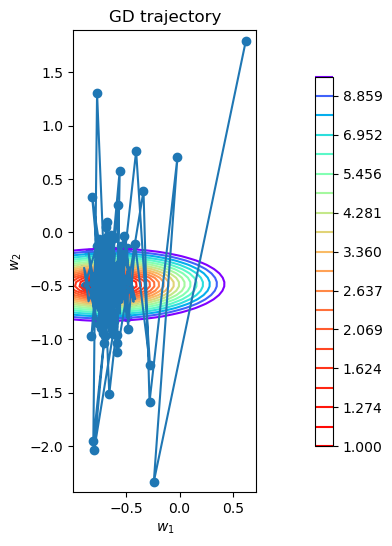

lr = 0.0115, batch_size = 10, loss = 16.892122237697418


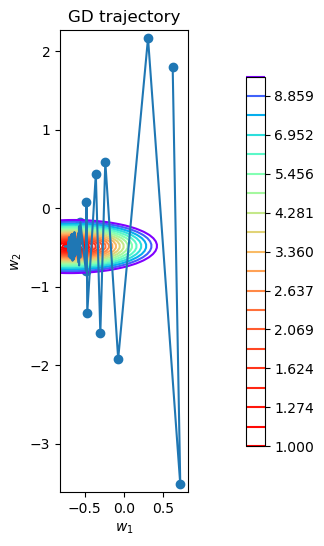

lr = 0.0115, batch_size = 50, loss = 1.1063249226249179


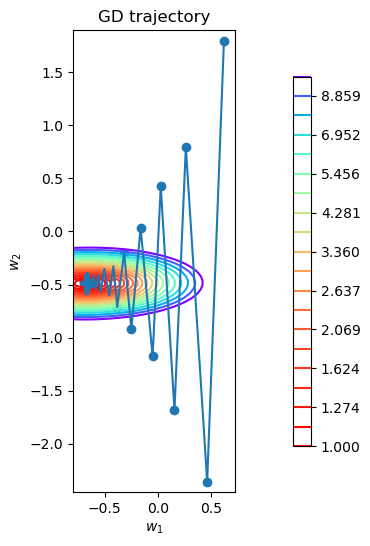

lr = 0.0115, batch_size = 100, loss = 0.9712206666457291


In [14]:
for lr in lrs:
    print(f"================lr = {lr}================")
    for batch_size in batch_sizes:
        w_list = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size)
        plot_gd(w_list, X, y, loss)
        print(f"lr = {lr}, batch_size = {batch_size}, loss = {loss.calc_loss(X, y, w_list[-1])}")

Отличительной особенностью траектории стохастического градиентного спуска (SGD) является то, что его траектория более "шумная", чем у обычного градиентного спуска. Это связано с тем, что SGD использует только часть выборки для вычисления градиента, что приводит к большему разбросу значений весов на каждом шаге.

Очевидно, что чем больше размер батча, тем меньше шум. При этом при слишком большом размере батча SGD становится похожим на обычный градиентный спуск, так как он использует почти всю выборку для вычисления градиента. Но у маленького размера батча SGD тоже есть свое преимущество — гораздо меньше вычислительной работы.

Также заметим, что при некоторых парах значений `lr` и `batch_size` SGD может не сойтись. Одновременно накладывается эффект слишком большого шага ($0.01$ и $0.015$) и слишком маленького размера батча ($1$, то есть буквально всего лишь один объект определяет, в каком направлении пойдет дальше вектор весов).

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага.

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы точнее этого минимума достигнуть и не "перепрыгнуть" его.

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [15]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) - начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) - матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) - вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float - параметр величины шага, на который нужно домножать градиент
    :param batch_size: int - размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float - значение степени в формуле затухания длины шага
    :param n_iterations: int - сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) - история весов на каждом шаге
    """
    s_init = 1
    trace = np.zeros((n_iterations + 1, w_init.shape[0]))
    trace[0] = w_init
    for i in range(n_iterations):
        idx = np.random.choice(X.shape[0], batch_size, replace=False)
        X_batch = X[idx]
        y_batch = y[idx]
        grad = loss.calc_grad(X_batch, y_batch, trace[i])
        s = np.power(s_init / (s_init + i), p)
        w = trace[i] - lr * s * grad
        trace[i + 1] = w
    return trace

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска. Что происходит при маленьком или большом значении p?

In [16]:
lr = 1e-2
batch_size = 10

ps = [1, 0.7, 0.5, 0.3, 0.1]

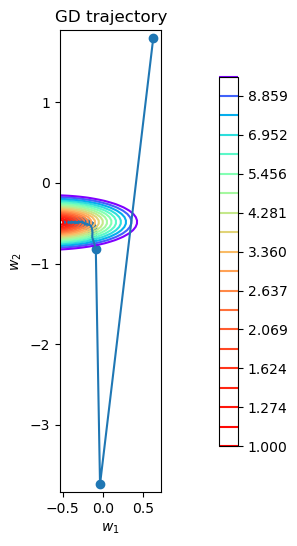

lr = 0.01, batch_size = 10, p = 1, loss = 1.2924941188076653


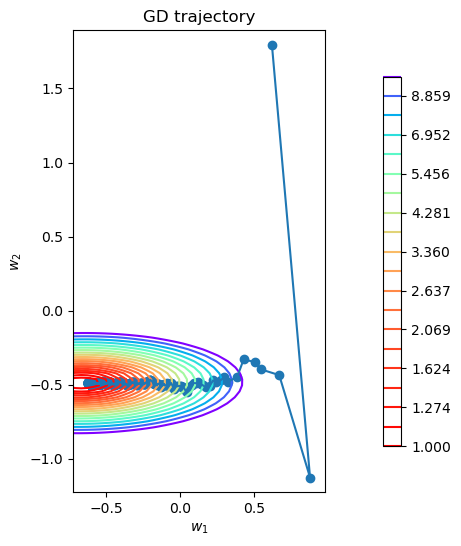

lr = 0.01, batch_size = 10, p = 0.7, loss = 0.8848372409227234


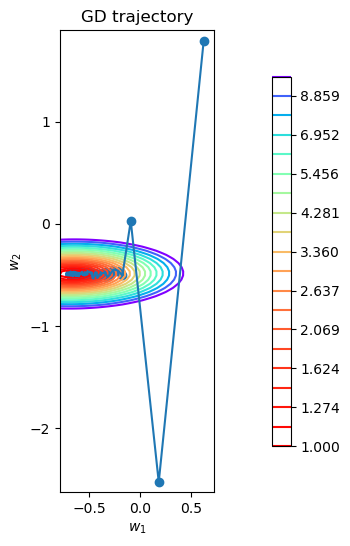

lr = 0.01, batch_size = 10, p = 0.5, loss = 0.8748164778148242


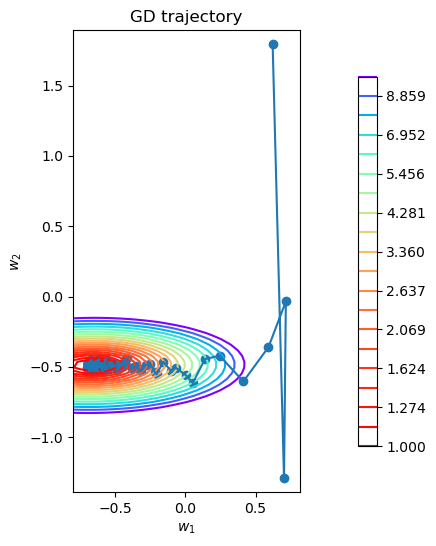

lr = 0.01, batch_size = 10, p = 0.3, loss = 0.9044152385544735


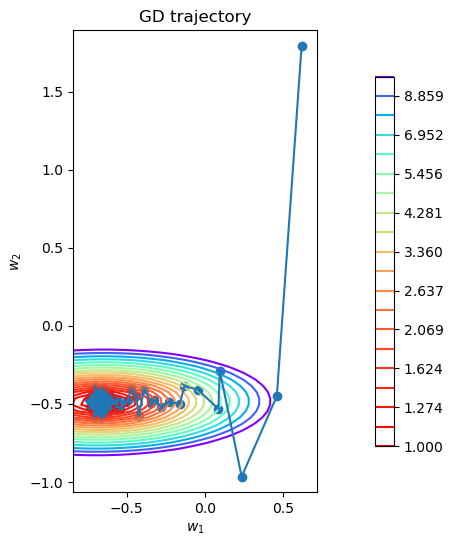

lr = 0.01, batch_size = 10, p = 0.1, loss = 1.0674118734893494


In [17]:
for p in ps:
    w_list = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, p)
    plot_gd(w_list, X, y, loss)
    print(f"lr = {lr}, batch_size = {batch_size}, p = {p}, loss = {loss.calc_loss(X, y, w_list[-1])}")

При большом значении $p$ шаги становятся маленькими гораздо быстрее, чем при маленьком. Это приводит к тому, что SGD при $p=1$ не успевает сойтись к минимуму. Чем меньше становится $p$, тем дольше шаги остаются относительно большими, поэтому вблизи минимума SGD может перескакивать его.

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

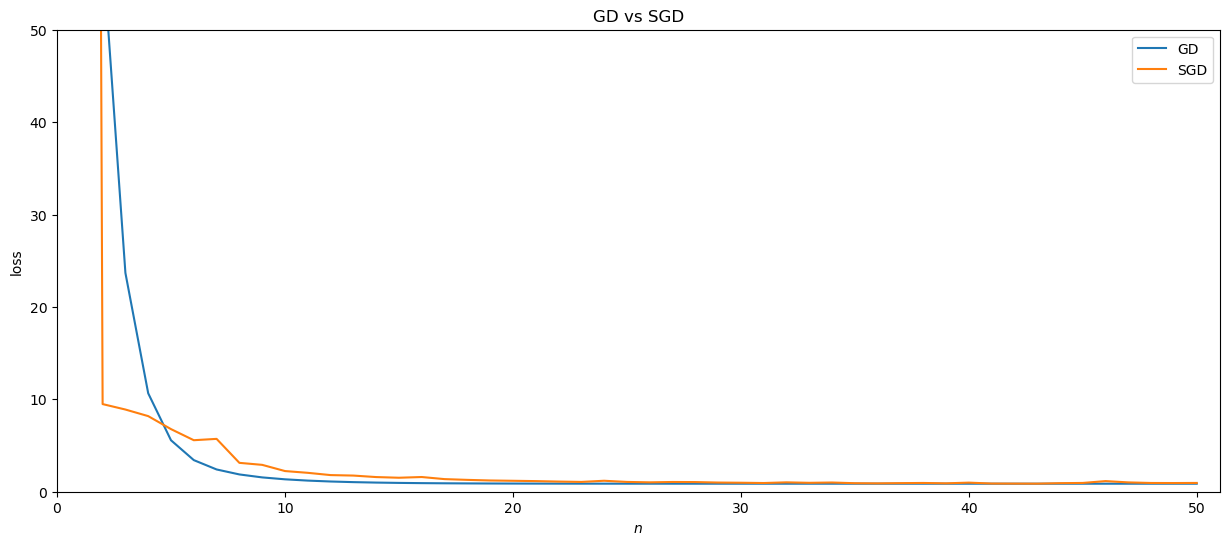

In [18]:
# Фиксируем параметры
n_iterations = 50
batch_size = 10
p = 0.3

gd = gradient_descent(w_init, X, y, loss, lr, n_iterations)
sgd = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, p, n_iterations)

plt.figure(figsize=(15, 6))
plt.title("GD vs SGD")
plt.xlabel(r"$n$")
plt.ylabel(r"loss")
plt.xlim(0, n_iterations + 1)
plt.ylim(0, 50)
plt.plot(np.arange(n_iterations + 1), np.apply_along_axis(lambda w: loss.calc_loss(X, y, w), 1, gd), label="GD")
plt.plot(np.arange(n_iterations + 1), np.apply_along_axis(lambda w: loss.calc_loss(X, y, w), 1, sgd), label="SGD")
plt.legend()

Основное преимущество SGD заключается в том, что он может обрабатывать большие объемы данных, так как на каждой итерации использует только часть выборки. В нашем случае массив данных небольшой, поэтому разница в скорости между обычным и стохастическим градиентным спуском совсем не заметна.

Что касается сходимости, при $n>30$ лосс GD и SGD совпадает, при меньших $n$ выигрывает обычный градиентный спуск. Это связано с тем, что в нем используется информация о всей выборке, что позволяет сразу найти правильное направление градиента.

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`.

В методе `predict` мы будем применять нашу регрессию к датасету.

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`.

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [19]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        w_init = np.random.uniform(-2, 2, (X.shape[1],))
        self.trace = gradient_descent(w_init, X, y, self.loss, self.lr) # trace для доп. задачи
        self.w = self.trace[-1]

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        return X @ self.w

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации.

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [20]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [21]:
import pandas as pd

X_raw = pd.read_csv(
    "cars_data.csv",
    header=None,
    na_values=["?"],
    skiprows=1,
    index_col=0
)
X_raw = X_raw[~X_raw[26].isna()].reset_index(drop=True)
X_raw.head()

1      2            3    4    5     6            7    8      9     10  ...  \
0   3    NaN  alfa-romero  gas  std   two  convertible  rwd  front  88.6  ...   
1   3    NaN  alfa-romero  gas  std   two  convertible  rwd  front  88.6  ...   
2   1    NaN  alfa-romero  gas  std   two    hatchback  rwd  front  94.5  ...   
3   2  164.0         audi  gas  std  four        sedan  fwd  front  99.8  ...   
4   2  164.0         audi  gas  std  four        sedan  4wd  front  99.4  ...   

    17    18    19    20    21     22      23  24  25       26  
0  130  mpfi  3.47  2.68   9.0  111.0  5000.0  21  27  13495.0  
1  130  mpfi  3.47  2.68   9.0  111.0  5000.0  21  27  16500.0  
2  152  mpfi  2.68  3.47   9.0  154.0  5000.0  19  26  16500.0  
3  109  mpfi  3.19  3.40  10.0  102.0  5500.0  24  30  13950.0  
4  136  mpfi  3.19  3.40   8.0  115.0  5500.0  18  22  17450.0  

[5 rows x 26 columns]

In [22]:
y = X_raw[26]
X_raw = X_raw.drop(26, axis=1)

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [23]:
X_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       201 non-null    int64  
 1   2       164 non-null    float64
 2   3       201 non-null    object 
 3   4       201 non-null    object 
 4   5       201 non-null    object 
 5   6       199 non-null    object 
 6   7       201 non-null    object 
 7   8       201 non-null    object 
 8   9       201 non-null    object 
 9   10      201 non-null    float64
 10  11      201 non-null    float64
 11  12      201 non-null    float64
 12  13      201 non-null    float64
 13  14      201 non-null    int64  
 14  15      201 non-null    object 
 15  16      201 non-null    object 
 16  17      201 non-null    int64  
 17  18      201 non-null    object 
 18  19      197 non-null    float64
 19  20      197 non-null    float64
 20  21      201 non-null    float64
 21  22      199 non-null    float64
 22  23

Среди вещественных признаков пропусков достаточно много пропусков — удалять не вариант. Предлагается заполнить их медианой (лучше, чем среднее, потому что не настолько чувствительна к выбросам). Однако перед этим разобьем датасет на train и test, чтобы не подмешивать тестовые данные в обучающие.

С пропусками в категориальных признаках поступим просто — заменим их на пустые строки.

Для лучшего разбиения данных на train и test хотим воспользоваться параметром stratify, для которого нужно указать категориальный признак. Дискретизируем его на несколько бинов, чтобы использовать их для стратификации. Количество бинов определим с помощью [формулы Стердженса](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B0%D0%B2%D0%B8%D0%BB%D0%BE_%D0%A1%D1%82%D1%91%D1%80%D0%B4%D0%B6%D0%B5%D1%81%D0%B0).

In [24]:
from sklearn.model_selection import train_test_split

n_bins = 1 + int(np.log2(X_raw.shape[0]))
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.2, random_state=42, shuffle=True, stratify=pd.cut(y, bins=n_bins, labels=False))
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 25), (41, 25), (160,), (41,))

In [25]:
from sklearn.impute import SimpleImputer

# Заполняем пропуски
# создаем маску, указывающую на столбцы с категориальными признаками
cat_features_mask = (X_raw.dtypes == "object").values

# для вещественнозначных признаков заполним пропуски медианой
X_train_real = X_train[X_train.columns[~cat_features_mask]]
X_test_real = X_test[X_test.columns[~cat_features_mask]]
real_mis_replacer = SimpleImputer(strategy="median")
X_train_real = pd.DataFrame(
    data=real_mis_replacer.fit_transform(X_train_real), columns=X_train_real.columns
)
X_test_real = pd.DataFrame(
    data=real_mis_replacer.transform(X_test_real), columns=X_test_real.columns
)

# для категориальных признаков заполним пропуски пустыми строками
X_train_cat = X_train[X_train.columns[cat_features_mask]]
X_test_cat = X_test[X_test.columns[cat_features_mask]]
# для однообразия, можно было по-другому 
cat_mis_replacer = SimpleImputer(strategy="constant", fill_value="")
X_train_cat = pd.DataFrame(
    data=cat_mis_replacer.fit_transform(X_train_cat), columns=X_train_cat.columns
)
X_test_cat = pd.DataFrame(
    data=cat_mis_replacer.transform(X_test_cat), columns=X_test_cat.columns
)

# объединяем обратно
X_train_fill = pd.concat([X_train_real, X_train_cat], axis=1)
X_test_fill = pd.concat([X_test_real, X_test_cat], axis=1)

X_train_fill.head()

1      2     10     11    12    13      14     17    19    20  ...  \
0  3.0  153.0  96.3  173.0  65.4  49.4  2370.0  110.0  3.17  3.46  ...   
1  0.0  115.0  98.8  177.8  66.5  55.5  2410.0  122.0  3.39  3.39  ...   
2  2.0   94.0  97.3  171.7  65.5  55.7  2300.0  109.0  3.19  3.40  ...   
3  1.0  103.0  94.5  170.2  63.8  53.5  2037.0   97.0  3.15  3.29  ...   
4  1.0  125.0  96.3  172.4  65.4  51.6  2405.0  122.0  3.35  3.46  ...   

           3    4      5     6          7    8      9    15    16    18  
0  mitsubishi  gas  turbo   two  hatchback  fwd  front  ohc  four  spdi  
1       mazda  gas    std  four      sedan  fwd  front  ohc  four  2bbl  
2  volkswagen  gas    std  four      sedan  fwd  front  ohc  four  mpfi  
3      nissan  gas    std  four      wagon  fwd  front  ohc  four  2bbl  
4  mitsubishi  gas    std  four      sedan  fwd  front  ohc  four  2bbl  

[5 rows x 25 columns]

In [26]:
# Убеждаемся в том, что пропусков нет и мы все сделали верно
X_train_fill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       160 non-null    float64
 1   2       160 non-null    float64
 2   10      160 non-null    float64
 3   11      160 non-null    float64
 4   12      160 non-null    float64
 5   13      160 non-null    float64
 6   14      160 non-null    float64
 7   17      160 non-null    float64
 8   19      160 non-null    float64
 9   20      160 non-null    float64
 10  21      160 non-null    float64
 11  22      160 non-null    float64
 12  23      160 non-null    float64
 13  24      160 non-null    float64
 14  25      160 non-null    float64
 15  3       160 non-null    object 
 16  4       160 non-null    object 
 17  5       160 non-null    object 
 18  6       160 non-null    object 
 19  7       160 non-null    object 
 20  8       160 non-null    object 
 21  9       160 non-null    object 
 22  15

In [27]:
X_test_fill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       41 non-null     float64
 1   2       41 non-null     float64
 2   10      41 non-null     float64
 3   11      41 non-null     float64
 4   12      41 non-null     float64
 5   13      41 non-null     float64
 6   14      41 non-null     float64
 7   17      41 non-null     float64
 8   19      41 non-null     float64
 9   20      41 non-null     float64
 10  21      41 non-null     float64
 11  22      41 non-null     float64
 12  23      41 non-null     float64
 13  24      41 non-null     float64
 14  25      41 non-null     float64
 15  3       41 non-null     object 
 16  4       41 non-null     object 
 17  5       41 non-null     object 
 18  6       41 non-null     object 
 19  7       41 non-null     object 
 20  8       41 non-null     object 
 21  9       41 non-null     object 
 22  15  

Нам осталось закодировать категориальные признаки и отмасштабировать вещественные. Воспользуемся `ColumnTransformer` из `sklearn`, чтобы сделать это в один шаг. Для кодирования категориальных признаков воспользуемся `OneHotEncoder`, а для масштабирования вещественных — `StandardScaler`. 

In [28]:
cat_features = X_train.columns[X_train.dtypes == 'object'].tolist()
num_features = X_train.columns[X_train.dtypes != 'object'].tolist()
cat_features, num_features

([3, 4, 5, 6, 7, 8, 9, 15, 16, 18],
 [1, 2, 10, 11, 12, 13, 14, 17, 19, 20, 21, 22, 23, 24, 25])

In [29]:
cat_features_mask = (X_train_fill.dtypes == "object").values

cat_features_idx = np.arange(X_train_fill.shape[1])[cat_features_mask]
num_features_idx = np.arange(X_train_fill.shape[1])[~cat_features_mask]
cat_features_idx, num_features_idx

(array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]))

In [30]:
X_train_fill.iloc[:, cat_features_idx].head()

3    4      5     6          7    8      9    15    16    18
0  mitsubishi  gas  turbo   two  hatchback  fwd  front  ohc  four  spdi
1       mazda  gas    std  four      sedan  fwd  front  ohc  four  2bbl
2  volkswagen  gas    std  four      sedan  fwd  front  ohc  four  mpfi
3      nissan  gas    std  four      wagon  fwd  front  ohc  four  2bbl
4  mitsubishi  gas    std  four      sedan  fwd  front  ohc  four  2bbl

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# transformers принимает индексы признаков
cat_features_mask = (X_train_fill.dtypes == "object").values
cat_features_idx = np.arange(X_train_fill.shape[1])[cat_features_mask]
num_features_idx = np.arange(X_train_fill.shape[1])[~cat_features_mask]

# Создаем препроцессор
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), num_features_idx),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features_idx)
    ])

# Обучаем препроцессор только на тренировочных данных
preprocessor.fit(X_train_fill)

# Преобразуем оба набора данных
X_train_processed = preprocessor.transform(X_train_fill)
X_test_processed = preprocessor.transform(X_test_fill)

/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [32]:
linear_regression.fit(X_train_processed, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [33]:
from sklearn.metrics import mean_squared_error

y_train_res = linear_regression.predict(X_train_processed)
y_test_res = linear_regression.predict(X_test_processed)


In [34]:
mse_test_without_reg = mean_squared_error(y_test, y_test_res)

print(mean_squared_error(y_train, y_train_res))
print(mse_test_without_reg)

1905007.6945959025
10947979.261101827


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации.

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`.

Он должен вычислять лосс и градиент по формулам выше.

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`.

In [35]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        return np.linalg.norm(X @ w - y) ** 2 / X.shape[0] + self.coef * np.linalg.norm(w[:-1]) ** 2

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        return (X.T @ (X @ w - y)) * 2 / X.shape[0] + self.coef * np.concatenate([w[:-1], [0]])

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [36]:
linear_regression = LinearRegression(MSEL2Loss(0.1))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации.

In [37]:
models = {}
coefs = [1e-4, 1e-3, 1e-2, 5e-2, 1e-1, 5e-1, 1]
min_mse = mse_test_without_reg

for coef in coefs:
    models[coef] = LinearRegression(MSEL2Loss(coef))
    models[coef].fit(X_train_processed, y_train)
    y_test_res = models[coef].predict(X_test_processed)
    mse_test = mean_squared_error(y_test, y_test_res)
    if mse_test < min_mse:
        min_mse = mse_test
        best_coef = coef

print(f"Best coef: {best_coef}, MSE: {min_mse}") 

Best coef: 0.001, MSE: 3520486.974827946


In [38]:
# У ближайших соседей

print(mean_squared_error(y_test, models[1e-4].predict(X_test_processed)))
print(mean_squared_error(y_test, models[1e-2].predict(X_test_processed)))

8040624.902925625
4323534.396062968


In [39]:
# Поищем еще на интервале 0.001 до 0.01

for coef in np.linspace(0.001, 0.01, 10):
    models[coef] = LinearRegression(MSEL2Loss(coef))
    models[coef].fit(X_train_processed, y_train)
    y_test_res = models[coef].predict(X_test_processed)
    mse_test = mean_squared_error(y_test, y_test_res)
    print(f"coef: {coef}, MSE: {mse_test}")

coef: 0.001, MSE: 3520487.0109147104
coef: 0.002, MSE: 3068835.4519414455
coef: 0.003, MSE: 3073539.2616210706
coef: 0.004, MSE: 3198302.0097707105
coef: 0.005, MSE: 3366978.238988142
coef: 0.006, MSE: 3553511.994883131
coef: 0.007, MSE: 3746746.0304085067
coef: 0.008, MSE: 3941212.7061220845
coef: 0.009000000000000001, MSE: 4134009.8642412997
coef: 0.01, MSE: 4323534.396062968


Лучшая модель получилась с коэффициентом регуляризации $\lambda = 0.002$.

In [40]:
print("Train MSE:\t", mean_squared_error(y_train, models[0.002].predict(X_train_processed)))
print("Test MSE:\t", mean_squared_error(y_test, models[0.002].predict(X_test_processed)))

Train MSE:	 2477563.6135685006
Test MSE:	 3068835.4519414455


В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`.

Он должен вычислять лосс и градиент по формулам выше.

In [41]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps
    
    def phi(self, z: np.ndarray) -> np.ndarray:
        return np.where(np.abs(z) < self.eps, 0.5 * z ** 2, self.eps * (np.abs(z) - 0.5 * self.eps))

    def dphi(self, z: np.ndarray) -> np.ndarray:
        return np.where(np.abs(z) < self.eps, z, self.eps * np.sign(z))

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        return np.mean(self.phi(X @ w - y))

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        return X.T @ self.dphi(X @ w - y) / X.shape[0]

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [42]:
huber_models = {}
huber_coefs = [20, 50, 100, 200, 300, 500, 700, 1000]
min_mse = mse_test_without_reg

for coef in huber_coefs:
    huber_models[coef] = LinearRegression(HuberLoss(coef))
    huber_models[coef].fit(X_train_processed, y_train)
    y_test_res = huber_models[coef].predict(X_test_processed)
    mse_test = mean_squared_error(y_test, y_test_res)
    if mse_test < min_mse:
        min_mse = mse_test
        best_coef = coef
print(f"Best coef: {best_coef}, MSE: {min_mse}")

Best coef: 100, MSE: 2172485.493001358


In [43]:
print(mean_squared_error(y_train, huber_models[best_coef].predict(X_train_processed)))
print(mean_squared_error(y_test, huber_models[best_coef].predict(X_test_processed)))

3645434.8536245287
2172485.493001358


Удивительно, но факт!

MSE на тестовой выборке лучше, чем на обучающей. Скорее всего, это связано с тем, что в тестовой выборке меньше выбросов, чем в обучающей. Особенность Huber Loss заключается в том, что он меньше реагирует на выбросы, тем самым меньше подстраивается конкретно под обучающую выборку.

Если сравнивать только на test выборке, то Huber Loss показал результат лучше, чем MSE с L2 регуляризацией и MSE без регуляризации.

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2025 в ячейку ниже:

![meme](hello.jpg)

### БОНУС (2 балла)

Градиентный спуск — далеко не единственный метод оптимизации.
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2 балла)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии.

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределения с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [44]:
def annealing(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    df: float = 3.0,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    trace = np.zeros((n_iterations + 1, w_init.shape[0]))
    trace[0] = w_init
    for i in range(n_iterations):
        new = trace[i] + np.random.standard_t(df, size=w_init.shape)
        delta = loss.calc_loss(X, y, new) - loss.calc_loss(X, y, trace[i])
        if delta < 0:
            trace[i + 1] = new
        else:
            factor = (n_iterations - i) / n_iterations
            p = np.exp(-delta / factor)
            if np.random.rand() < p:
                trace[i + 1] = new
            else:
                trace[i + 1] = trace[i]
    return trace

In [45]:
class AnnealingLinearRegression:
    def __init__(self, loss: BaseLoss, df: float = 3.0) -> None:
        self.loss = loss
        self.df = df
        

    def fit(self, X: np.ndarray, y: np.ndarray) -> "AnnealingLinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        w_init = np.random.uniform(-2, 2, (X.shape[1],))
        self.trace = annealing(w_init, X, y, self.loss, self.df)
        self.w = self.trace[-1]

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        return X @ self.w

In [46]:
linear_regression = AnnealingLinearRegression(HuberLoss(100))
linear_regression.fit(X_train_processed, y_train)
y_train_res = linear_regression.predict(X_train_processed)
y_test_res = linear_regression.predict(X_test_processed)
print("Train MSE:\t", mean_squared_error(y_train, y_train_res))
print("Test MSE:\t", mean_squared_error(y_test, y_test_res))

Train MSE:	 3477155.113187137
Test MSE:	 2358530.328389106


Для сравнения значения из прошлого пункта:

```
Train MSE: 3645434.8536245287
Test MSE: 2172485.493001358
```

Опять же получили MSE на тестовой выборке лучше, чем на обучающей. Причины этого уже обсуждались выше.

Интересно заметить, что на обучающей выборке алгоритм имитации отжига показал результат лучше, чем градиентный спуск. Скорее всего, это связано с случайностью в алгоритме имитации отжига.

Теперь поэкспериментируем с количеством степеней свободы распределения Стьюдента.

In [47]:
from tqdm import tqdm

dfs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

models = {}
best_test_mse = np.inf
best_df = None

for df in tqdm(dfs):
    models[df] = AnnealingLinearRegression(HuberLoss(100), df)
    models[df].fit(X_train_processed, y_train)
    y_test_res = models[df].predict(X_test_processed)
    mse_test = mean_squared_error(y_test, y_test_res)
    if mse_test < best_test_mse:
        best_test_mse = mse_test
        best_df = df
print(f"Best df: {best_df}, MSE: {best_test_mse}")
print(mean_squared_error(y_train, models[best_df].predict(X_train_processed)))
print(mean_squared_error(y_test, models[best_df].predict(X_test_processed)))
    

100%|██████████| 10/10 [00:51<00:00,  5.19s/it]

Best df: 10, MSE: 2145869.4453476793
3713475.468766826
2145869.4453476793


Результат лучше, чем у градиентного спуска...

Посмотрим, что там с траекторией на маленькой выборке и при двух признаках. 

In [48]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :] # разные масштабы признаков
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


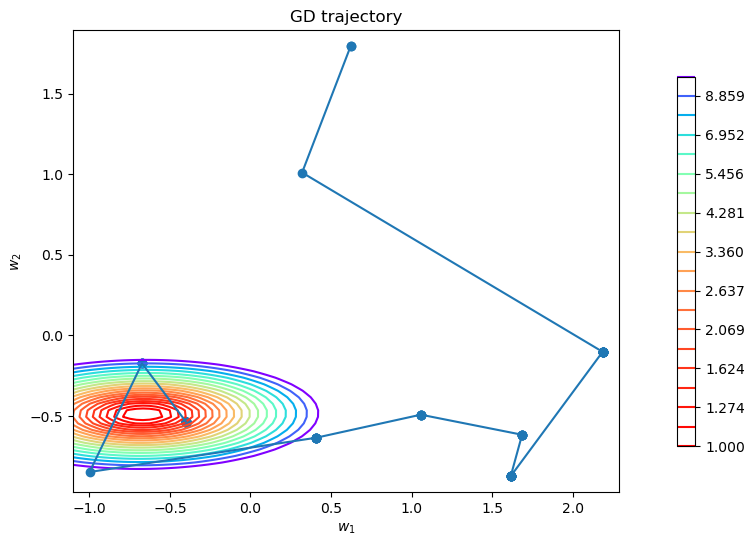

1.5870102139886677


In [49]:
w_list = annealing(w_init, X, y, HuberLoss(100), 7.0, 100)
plot_gd(w_list, X, y, loss)
print(loss.calc_loss(X, y, w_list[-1]))

Видно, что случайность траектории еще больше, чем при SGD, нету даже никакого направления. Запустим на большем количествое итераций.

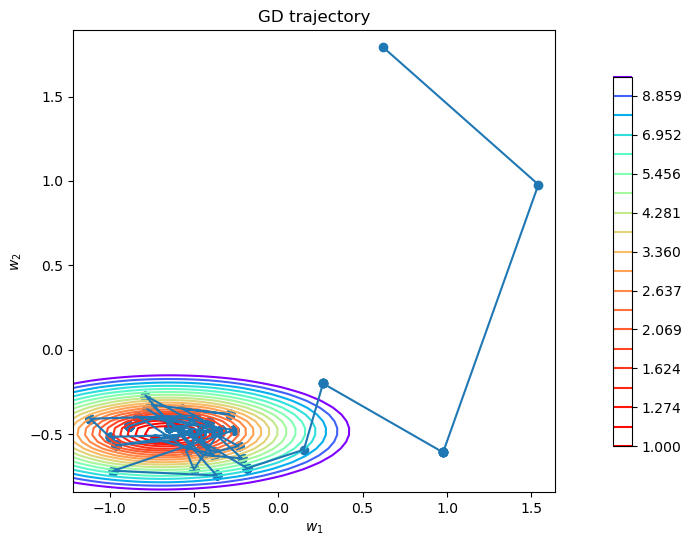

1.3458498950526225


In [50]:
w_list = annealing(w_init, X, y, HuberLoss(100), 7.0, 1000)
plot_gd(w_list, X, y, loss)
print(loss.calc_loss(X, y, w_list[-1]))

Аналогично прослеживается неустойчивое поведение. При этом, чем больше итераций, тем больше вероятность того, что алгоритм имитации отжига найдет минимум.